In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

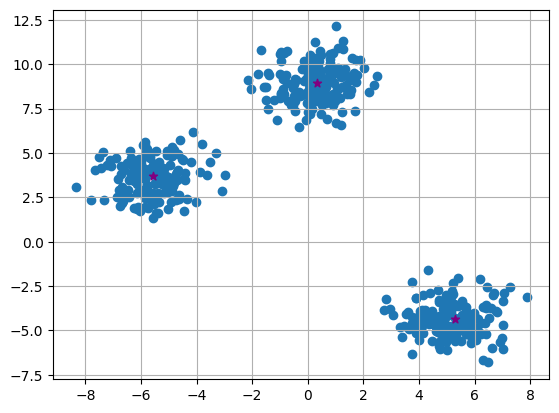

In [42]:
X, y, orig_centers = make_blobs(
    n_samples=500, n_features=2, centers=3, random_state=23, return_centers=True
)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
for center in orig_centers:
    plt.scatter(center[0], center[1], marker="*", c="purple")
plt.show()

In [43]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2 * (2 * np.random.random((X.shape[1],)) - 1)
    points = []
    cluster = {"center": center, "points": []}

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

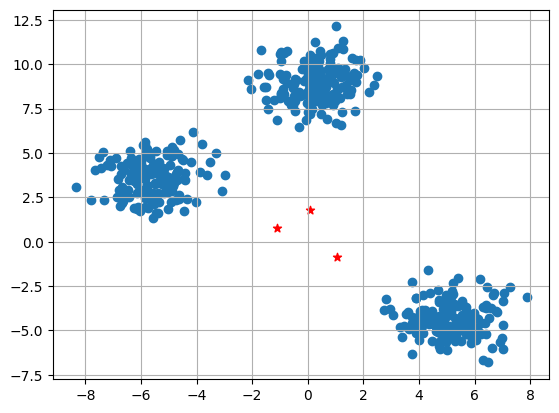

In [44]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
for i in clusters:
    center = clusters[i]["center"]
    plt.scatter(center[0], center[1], marker="*", c="red")
plt.show()

In [45]:
X[0].shape

(2,)

In [46]:
def euclid_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [66]:
# assign data points to nearest cluster center

for i in range(X.shape[0]):
    dists = []  # store distances to each cluster center
    curr_x = X[i]
    for j in range(k):  # through each cluster
        dist = euclid_distance(curr_x, clusters[j]["center"])
        dists.append(dist)
    curr_cluster = np.argmin(
        dists
    )  # find which cluster center closest to current point
    clusters[curr_cluster]["points"].append(curr_x)

# move centers to mean of their assigned points
for i in range(k):
    points = np.array(clusters[i]["points"])  # all points of the cluster
    if points.shape[0] > 0:
        new_center = points.mean(axis=0)
        clusters[i]["center"] = new_center
        clusters[i]["points"] = []
print(clusters)

{0: {'center': array([0.293089  , 8.93255251]), 'points': []}, 1: {'center': array([ 5.1482619 , -4.38609379]), 'points': []}, 2: {'center': array([-5.64869015,  3.64917816]), 'points': []}}


In [61]:
# after convergence, assign points to final clusters
pred = []
for i in range(X.shape[0]):
    dists = []
    for j in range(k):
        dists.append(euclid_distance(X[i],clusters[j]['center']))
    pred.append(np.argmin(dists))

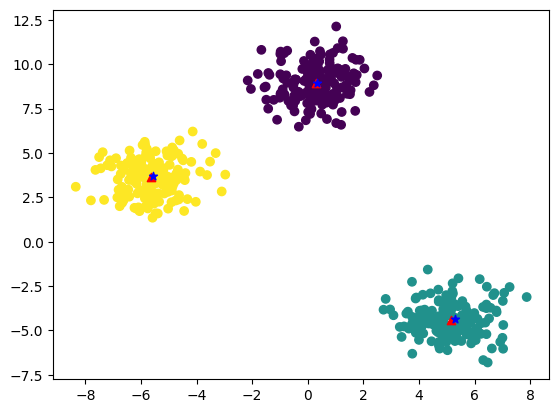

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=pred)
centers = []
for i in clusters:
    center = clusters[i]["center"]
    centers.append(center)
    plt.scatter(center[0], center[1], marker="^", c="red")
    plt.scatter(orig_centers[i][0], orig_centers[i][1], marker="*", c="blue")

plt.show()

In [63]:
print(orig_centers)
print(centers)

[[ 0.34595768  8.93925208]
 [ 5.30919519 -4.35208312]
 [-5.57909273  3.7244417 ]]
[array([0.293089  , 8.93255251]), array([ 5.1482619 , -4.38609379]), array([-5.64869015,  3.64917816])]


### CIFAR10